# Machine Learning Assignment


<div style="width: 1000px; height: 600px;" align="center">
    <img src="https://github.com/backkerrmutt/Image/blob/main/ML/Untitled%20picture.png?raw=true" width="70%" height="50%">
</div>


ชื่อกลุ่ม ใครเขาจะบอกชื่อกลุ่มกัน


###การนำเสนอผลงาน (อัดวีดีโอนำเสนอผ่าน Youtube)
[Link Video](https://youtu.be/q8CzRVI2CAk)

# ชื่อกลุ่ม ใครเขาจะบอกชื่อกลุ่มกัน

##สมาชิก

| ID | Name <img width=200/> | a.k.a. | e-mail | colab URL |
|-------|-------|-------|-------| -------|
| 116510400643-2 | นายจิระเจตน์ สวนอนันตภูมิ | RUGTARE | jirajaet007@gmail.com | [Profile](https://colab.research.google.com/drive/1VChBNdzd4NfUop0JZA3cXH_gw9nCyuN1?usp=sharing) |
| 116510400678-8 | นายธิเบต ชูกอง | F_SPU | mizcrofried@gmail.com | [Profile](https://colab.research.google.com/drive/1yXE592RPP9CZRt_w1zNv44dt-1rn1FWd#scrollTo=ZebnE5J7sS_a) |
| 116510400662-2 | นายอนุพงษ์ ปวงคำ | Backker | 18janury@gmail.com | [Profile](https://colab.research.google.com/drive/19PlCj7al06fpC2AjciZnUyokKlRnvvbb) |

# 1. เลือกข้อมูลในการทำโครงงาน

| ลำดับที่ |  ชื่อข้อมูล <img width=200/> | URL | Data Sources |
| ----------------| ------------------- |----------------- | ---------------------- |
| 1 | wisesight_sentiment | https://huggingface.co/datasets/pythainlp/wisesight_sentiment |huggingface
| 2 | stanfordnlp/sst2 | https://huggingface.co/datasets/stanfordnlp/sst2 |huggingface
| 3 | airesearch/WangchanX-Legal-ThaiCCL-RAG | https://huggingface.co/datasets/airesearch/WangchanX-Legal-ThaiCCL-RAG |huggingface
| 4 | ร้านอาหาร ยอดนิยม ในสยาม และ กรุงเทพและปริมณฑล - Wongnai |[link](https://getdata.io/data-sources/90151-%E0%B8%A3-%E0%B8%B2%E0%B8%99%E0%B8%AD%E0%B8%B2%E0%B8%AB%E0%B8%B2%E0%B8%A3-%E0%B8%A2%E0%B8%AD%E0%B8%94%E0%B8%99%E0%B8%B4%E0%B8%A2%E0%B8%A1-%E0%B9%83%E0%B8%99%E0%B8%AA%E0%B8%A2%E0%B8%B2%E0%B8%A1-%E0%B9%81%E0%B8%A5%E0%B8%B0-%E0%B8%81%E0%B8%A3%E0%B8%B8%E0%B8%87%E0%B9%80%E0%B8%97%E0%B8%9E%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%93%E0%B8%91%E0%B8%A5-wongnai) |getdata.io
| 5 | ThaiSum | https://www.kaggle.com/datasets/ratthachat/nakhunchumpolsathien-thaisum |kaggle
| 6 | Dinosaturday Dataset | https://www.kaggle.com/datasets/timefear007/dinosaturday-dataset |kaggle
| 7 | แสดงความคิดเห็น/ข้อเสนอแนะในการพัฒนางานภาครัฐจากกิจกรรม My Better Country Hackathon | (https://dev-portal.gdcatalog.go.th/dataset/gdpublish-dataset_2_011) |datasetsearch


* เราได้ทำการเลือกชุดข้อมูลที่ 1 จากทั้งหมด 7 ชุดข้อมูลในการทำ Assignment

# 2. การเตรียมข้อมูล (Data Preparation)

## 2.1  ติดตั้งไลบรารีที่จำเป็นและดาวโหลด (data set)

### 2.2.1 การติดตั้งไลบรารี

In [ ]:
!pip install transformers pandas numpy scikit-learn datasets
!pip install pythainlp

from datasets import load_dataset
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import re
from collections import Counter
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 23.2 MB/s eta 0:00:00


### 2.1.2 การโหลดข้อมูลจาก Huggingface

In [ ]:
# ดาวน์โหลดข้อมูล
dataset = load_dataset("pythainlp/wisesight_sentiment")

# แสดงโครงสร้างของข้อมูล
print(dataset['train'].features)

# ข้อมูลก่อนการทำความสะอาดข้อมูล (Data Cleansing)
print(dataset['train'][0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.58M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/286k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/327k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21628 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2404 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2671 [00:00<?, ? examples/s]

{'texts': Value(dtype='string', id=None), 'category': ClassLabel(names=['pos', 'neu', 'neg', 'q'], id=None)}
{'texts': 'ไปจองมาแล้วนาจา Mitsubishi Attrage ได้หลังสงกรานต์เลย รอขับอยู่นาจา กระทัดรัด เหมาะกับสาวๆขับรถคนเดียวแบบเรา ราคาสบายกระเป๋า ประหยัดน้ำมัน วิ่งไกลแค่ไหนหายห่วงค่ะ', 'category': 1}


## 2.2 การทำความสะอาดข้อมูล (Data Cleansing)

* ใช้ pythainlp ในการทำความสะอาดและแปลงข้อความ:

In [ ]:
# ฟังก์ชันทำความสะอาดข้อความ
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # ลบอักขระพิเศษและตัวเลข
    text = re.sub(r'[^ก-๙a-zA-Z\s]', '', text)
    # แปลงเป็นตัวพิมพ์เล็ก
    text = text.lower()
    return text

# ฟังก์ชันลบคำซ้ำ
def remove_duplicate_words(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    unique_words = list(Counter(words).keys())
    return ' '.join(unique_words)

# ฟังก์ชันลบคำที่ไม่สำคัญ
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    stopwords = set(thai_stopwords())
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# ฟังก์ชันรวมการทำความสะอาดข้อความทั้งหมด
def preprocess_text(example):
    text = example['texts']
    text = clean_text(text)
    text = remove_duplicate_words(text)
    text = remove_stopwords(text)
    example['texts'] = text
    return example

# ทำความสะอาดและลบคำซ้ำในชุดข้อมูล
for split in dataset.keys():
    dataset[split] = dataset[split].map(preprocess_text)

Map:   0%|          | 0/21628 [00:00<?, ? examples/s]

Map:   0%|          | 0/2404 [00:00<?, ? examples/s]

Map:   0%|          | 0/2671 [00:00<?, ? examples/s]

* แสดงข้อมูลที่ทำความสะอาดแล้ว

In [ ]:
print(dataset['train'][0])

{'texts': 'จอง แล้ วนา จา   mitsubishi   attrage   สงกรานต์   รอ ขับ นา จา   กระทัดรัด   เหมาะกับ สาว ขับรถ คนเดียว   ราคา กระเป๋า   ประหยัด น้ำมัน   วิ่ง หายห่วง', 'category': 1}


# 3 พัฒนาโปรแกรมในการวิเคระห์ข้อมูลเบื้องต้น (EDA)

## 3.1 สร้างและฝึกโมเดล Word2Vec

In [ ]:
from gensim.models import Word2Vec
from pythainlp.tokenize import word_tokenize

# เตรียมข้อมูลสำหรับการฝึก Word2Vec
sentences = [word_tokenize(text) for text in dataset['train']['texts']]

# สร้างโมเดล Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# บันทึกโมเดล
word2vec_model.save("word2vec.model")

อธิบายขั้นตอน:
1. นำเข้าไลบรารีที่จำเป็น: Word2Vec จาก gensim สำหรับการสร้างโมเดล <br> Word2Vec word_tokenize จาก pythainlp สำหรับการตัดคำในข้อความภาษาไทย
2. เตรียมข้อมูลสำหรับการฝึก Word2Vec:
ใช้ word_tokenize เพื่อแปลงข้อความในชุดข้อมูลฝึก (dataset['train']['texts']) ให้เป็นลิสต์ของคำ (tokens)
ผลลัพธ์จะเป็นลิสต์ของลิสต์คำ เช่น [['ไป', 'จอง', 'มา', 'แล้ว'], ['Mitsubishi', 'Attrage', 'ได้', 'หลัง', 'สงกรานต์']]
3. สร้างโมเดล Word2Vec:
ใช้ Word2Vec เพื่อสร้างโมเดล Word2Vec โดยกำหนดพารามิเตอร์ต่าง ๆ เช่น:
vector_size=100: ขนาดของเวกเตอร์<br>ที่ใช้แทนคำ (embedding dimension)
window=5: ขนาดของหน้าต่างคำที่ใช้ในการพิจารณาคำบริบท (context window)
min_count=1: คำที่ปรากฏน้อยกว่า 1 ครั้งจะถูกละเว้น
workers=4: จำนวนของ threads ที่ใช้ในการฝึกโมเดล
4. บันทึกโมเดล:
บันทึกโมเดลที่ฝึกแล้วลงในไฟล์ word2vec.model เพื่อใช้ในขั้นตอนถัดไป
ทำไมต้องใช้ Word2Vec:
Word2Vec เป็นเทคนิคที่ใช้ในการแปลงคำในข้อความให้เป็นเวกเตอร์ที่มีความหมายทางคณิตศาสตร์ ซึ่งสามารถใช้เป็นข้อมูลนำเข้าให้กับโมเดล Machine Learning หรือ Deep Learning ได้เวกเตอร์เหล่านี้จะช่วยให้โมเดลสามารถเข้าใจความสัมพันธ์ระหว่างคำและบริบทได้ดีขึ้น


## 3.2 แปลงข้อความเป็นเวกเตอร์

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from pythainlp.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# โหลดโมเดล Word2Vec
word2vec_model = Word2Vec.load("word2vec.model")

# ฟังก์ชันแปลงข้อความเป็นเวกเตอร์
def text_to_vector(text):
    words = word_tokenize(text)
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(vectors) > 0:
        vector = np.mean(vectors, axis=0)
    else:
        vector = np.zeros(word2vec_model.vector_size)
    return vector

# แปลงข้อความในชุดข้อมูลเป็นเวกเตอร์
X = [text_to_vector(text) for text in dataset['train']['texts']]
y = np.array(dataset['train']['category'])

# กำหนดพารามิเตอร์ของโมเดล
max_length = 100

# แปลงข้อความเป็นลำดับของเวกเตอร์
X_padded = pad_sequences(X, maxlen=max_length, padding='post', dtype='float32')

## 3.3 แบ่งข้อมูล (แบ่ง data_set ออกเป็น 1.taining_data 80% 2.validate_data 20%)

In [ ]:
# แบ่งข้อมูลเป็น train และ validation sets
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(17302, 100)
(4326, 100)
(17302,)
(4326,)


# 4 การพัฒนาโมเดลและการประประเมินประสิทธิภาพของโมเดล

## 4.1 สร้าง Model and Test

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import numpy as np

# สร้างโมเดล LSTM
model = Sequential()
model.add(Embedding(input_dim=len(word2vec_model.wv), output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(4, activation='softmax'))  # เปลี่ยนเป็น 4 classes และใช้ softmax activation

# คอมไพล์โมเดล
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# แสดงโครงสร้างของโมเดล
model.summary()  # แสดงโครงสร้างของโมเดลในรูปแบบตาราง

# สร้างภาพโครงสร้างของโมเดล
model.build(input_shape=(None, max_length))  # ให้ shape ของ input เพื่อ build model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 56s 179ms/step - accuracy: 0.5330 - loss: 1.1071 - val_accuracy: 0.5460 - val_loss: 1.0731
Epoch 2/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 78s 183ms/step - accuracy: 0.5451 - loss: 1.0720 - val_accuracy: 0.5460 - val_loss: 1.0768
Epoch 3/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.5437 - loss: 1.0729 - val_accuracy: 0.5458 - val_loss: 1.0691
Epoch 4/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 81s 178ms/step - accuracy: 0.5456 - loss: 1.0685 - val_accuracy: 0.5460 - val_loss: 1.0684
Epoch 5/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.5427 - loss: 1.0751 - val_accuracy: 0.5458 - val_loss: 1.0688


### ประเมินผลโมเดล

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Training Accuracy: 0.5452
Training loss: 1.0693
Validation Accuracy:  0.5458
Validation loss: 1.0688


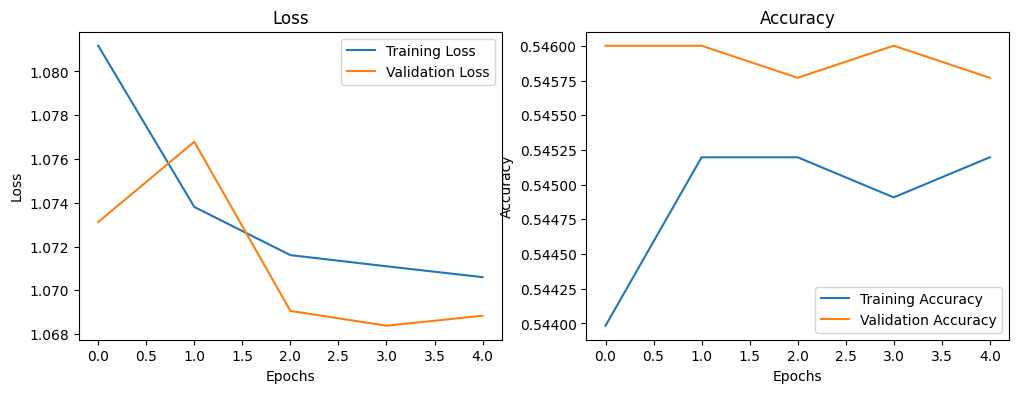

In [ ]:
import matplotlib.pyplot as plt

# พิมพ์ค่า history.history.keys()
print(history.history.keys())

# ประเมินผลโมเดล
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training loss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
print("Validation loss: {:.4f}".format(loss))

# ฟังก์ชัน plot ประวัติการฝึก
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# เรียกใช้ฟังก์ชัน plot ประวัติการฝึก
plot_history(history)


### precision, recall, f1-score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# ฟังก์ชันคำนวณค่า precision, recall, f1-score
def calculate_confusion_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return precision, recall, f1

# ประเมินความแม่นยำของโมเดล
result = model.predict(X_train)

# classes prediction for 'softmax' output layer
Y_train_pred = np.argmax(result, axis=1)

# คำนวณค่า confusion metrics สำหรับชุดข้อมูลฝึก
confusion = calculate_confusion_metrics(y_train, Y_train_pred)
pre, rec, f1 = confusion
print(f"Training Confusion (precision, recall, f1-score): {confusion}")
print("Training Precision = {:.4f}".format(float(pre)))
print("Training Recall = {:.4f}".format(rec))
print("Training F1 = {:.4f}".format(f1))
print()

result = model.predict(X_val)

# classes prediction for 'softmax' output layer
Y_val_pred = np.argmax(result, axis=1)

# คำนวณค่า confusion metrics สำหรับชุดข้อมูลทดสอบ
confusion = calculate_confusion_metrics(y_val, Y_val_pred)
pre, rec, f1 = confusion
print(f"Validation Confusion (precision, recall, f1-score): {confusion}")
print("Validation Precision = {:.4f}".format(float(pre)))
print("Validation Recall = {:.4f}".format(rec))
print("Validation F1 = {:.4f}".format(f1))
print()


541/541 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step
Training Confusion (precision, recall, f1-score): (0.297239863719039, 0.5451970870419605, 0.38472744507700113)
Training Precision = 0.2972
Training Recall = 0.5452
Training F1 = 0.3847

  3/136 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step
Validation Confusion (precision, recall, f1-score): (0.29805969550960854, 0.5457697642163661, 0.38555650757561144)
Validation Precision = 0.2981
Validation Recall = 0.5458
Validation F1 = 0.3856



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.2 ทำการปรับแต่ง Model

### รายงานการปรับแต่งโมเดล  (LSTM)
บทนำ
โมเดล LSTM (Long Short-Term Memory) เป็นหนึ่งในโมเดลที่นิยมใช้ในการประมวลผลข้อมูลลำดับ (sequential data) เช่น ข้อความหรือเสียง <br> ในรายงานนี้ เราได้ทำการปรับแต่งโมเดล LSTM เพื่อเพิ่มประสิทธิภาพในการจำแนกประเภทข้อมูล โดยมีการปรับแต่งหลายจุดเพื่อให้โมเดลสามารถเรียนรู้<br>และทำนายได้ดีขึ้น


### 4.2.1 เพิ่มจำนวน Epochs
* เหตุผล: การเพิ่มจำนวน epochs จาก 20 เป็น 30 ช่วยให้โมเดลมีโอกาสเรียนรู้จากข้อมูลมากขึ้น ซึ่งอาจช่วยปรับปรุงความแม่นยำของโมเดลได้ แต่ต้องระวังไม่ให้เกิดการ overfitting

history = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_val, y_val), verbose=1)

### 4.2.2 ปรับขนาดของ LSTM Layer
* เหตุผล: การเพิ่มจำนวนหน่วยใน LSTM layer จาก 128 เป็น 256 ช่วยให้โมเดลสามารถจับความซับซ้อนได้มากขึ้น ซึ่งอาจช่วยให้โมเดลสามารถเรียนรู้ลักษณะของข้อมูลได้ดีขึ้น

model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.3))

### 4.2.3 ปรับ Learning Rate
* เหตุผล: การลดค่า learning rate จาก 0.0001 เป็น 0.00005 ช่วยให้การปรับน้ำหนักของโมเดลมีความละเอียดมากขึ้น ซึ่งอาจช่วยให้โมเดลสามารถหาค่าที่เหมาะสมได้ดียิ่งขึ้น

optimizer = Adam(learning_rate=0.00005)

### 4.2.4 ใช้ Regularization Techniques
* เหตุผล: การใช้ L2 Regularization ช่วยลดการ overfitting โดยการเพิ่มค่าปรับในฟังก์ชันการสูญเสีย (loss function) ซึ่งจะช่วยให้โมเดลไม่เรียนรู้ข้อมูล noise มากเกินไป

model.add(Dense(4, activation='softmax', kernel_regularizer=l2(0.01)))

### 4.2.5 เพิ่มขนาด Batch Size
* เหตุผล: การเพิ่มขนาด batch size จาก 128 เป็น 256 ช่วยให้การฝึกโมเดลมีเสถียรภาพมากขึ้น เนื่องจากการอัปเดตน้ำหนักจะเกิดขึ้นน้อยครั้งกว่า แต่มีข้อมูลมากขึ้นในแต่ละครั้ง

history = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_val, y_val), verbose=1)

In [ ]:
from tensorflow.keras.regularizers import l2  # เพิ่มบรรทัดนี้
# สร้างโมเดล LSTM
model = Sequential()
model.add(Embedding(input_dim=len(word2vec_model.wv), output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, return_sequences=True))  # เพิ่มขนาดของ LSTM Layer
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.3))  # เพิ่มขนาดของ LSTM Layer
model.add(Dense(4, activation='softmax', kernel_regularizer=l2(0.01)))  # ใช้ L2 Regularization

# คอมไพล์โมเดล
optimizer = Adam(learning_rate=0.00005)  # ปรับ Learning Rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# สร้างโมเดล
model.build(input_shape=(None, max_length))

# แสดงโครงสร้างของโมเดล
model.summary()  # แสดงโครงสร้างของโมเดลในรูปแบบตาราง

# แสดงโครงสร้างของโมเดลในรูปแบบภาพ
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)  # สร้างภาพโครงสร้างของโมเดล

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_val, y_val), verbose=1)  # เพิ่มจำนวน Epochs และ Batch Size

# ประเมินผลโมเดล
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training loss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
print("Validation loss: {:.4f}".format(loss))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       2,333,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ (None, 100, 100)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 256)            │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,225,408 (12.30 MB)

 Trainable params: 3,225,408 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.5131 - loss: 1.3536 - val_accuracy: 0.5460 - val_loss: 1.1484
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.5413 - loss: 1.1528 - val_accuracy: 0.5460 - val_loss: 1.1423
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.5452 - loss: 1.1504 - val_accuracy: 0.5460 - val_loss: 1.1401
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.5433 - loss: 1.1450 - val_accuracy: 0.5460 - val_loss: 1.1372
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.5388 - loss: 1.1469 - val_accuracy: 0.5460 - val_loss: 1.1347
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.5474 - loss: 1.1350 - val_accuracy: 0.5460 - val_loss: 1.1333
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.5473 - loss: 1.1337 - val_accuracy: 0.5460 - val_loss: 1.1301
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - accuracy: 0.5450 - loss: 1.1320 - val_accu

### # เรียกใช้ฟังก์ชัน plot ประวัติการฝึก

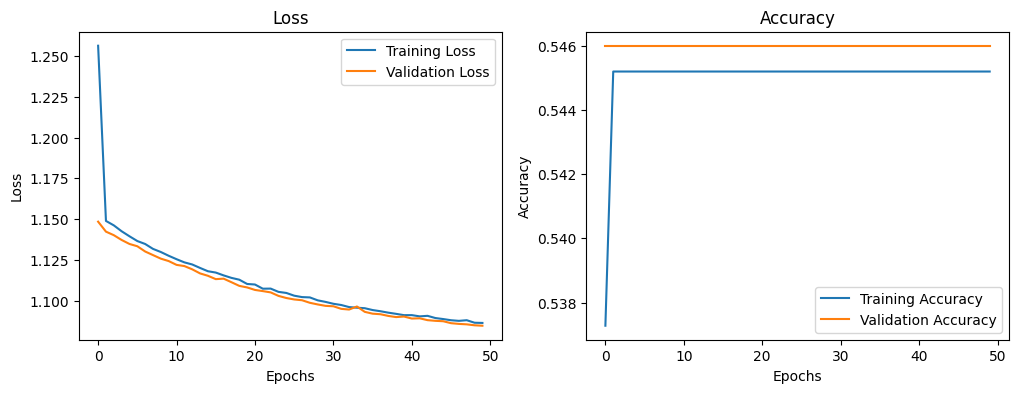

In [ ]:
plot_history(history)

### precision, recall, f1-score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# ฟังก์ชันคำนวณค่า precision, recall, f1-score
def calculate_confusion_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return precision, recall, f1

# ประเมินความแม่นยำของโมเดล
result = model.predict(X_train)

# classes prediction for 'softmax' output layer
Y_train_pred = np.argmax(result, axis=1)

# คำนวณค่า confusion metrics สำหรับชุดข้อมูลฝึก
confusion = calculate_confusion_metrics(y_train, Y_train_pred)
pre, rec, f1 = confusion
print(f"Training Confusion (precision, recall, f1-score): {confusion}")
print("Training Precision = {:.4f}".format(float(pre)))
print("Training Recall = {:.4f}".format(rec))
print("Training F1 = {:.4f}".format(f1))
print()

result = model.predict(X_val)

# classes prediction for 'softmax' output layer
Y_val_pred = np.argmax(result, axis=1)

# คำนวณค่า confusion metrics สำหรับชุดข้อมูลทดสอบ
confusion = calculate_confusion_metrics(y_val, Y_val_pred)
pre, rec, f1 = confusion
print(f"Validation Confusion (precision, recall, f1-score): {confusion}")
print("Validation Precision = {:.4f}".format(float(pre)))
print("Validation Recall = {:.4f}".format(rec))
print("Validation F1 = {:.4f}".format(f1))
print()


541/541 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step
Training Confusion (precision, recall, f1-score): (0.297239863719039, 0.5451970870419605, 0.38472744507700113)
Training Precision = 0.2972
Training Recall = 0.5452
Training F1 = 0.3847

  3/136 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step
Validation Confusion (precision, recall, f1-score): (0.2981170097095929, 0.5460009246417014, 0.3856621363647424)
Validation Precision = 0.2981
Validation Recall = 0.5460
Validation F1 = 0.3857



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
